In [1]:
## Linear Support Vector Machine
from sklearn.datasets import load_iris

data = load_iris()
X, y = data['data'], data['target']
y = (y==2)
y = y.astype(int)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [2]:
import numpy as np

shuffle_index = np.random.permutation(len(X))
X, y = X[shuffle_index], y[shuffle_index]
print(y)

[0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0]


In [13]:
t = lambda y: 1 if y==0 else -1
w = np.random.rand(1, 4)
b = np.random.randint(0,20)
t0, t1 = 5, 50
learning_schedule = lambda t: t0/(t + t1)
lmb = 0.5
epochs = 1000
m = 150

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        if yi * (xi.dot(w.T))[0, 0] < 1:
            gradient_w = lmb*w - (yi)*xi
        else:
            gradient_w = lmb*w
        eta = learning_schedule(epoch*m+i)
        w = w - eta*gradient_w
print(w, b)


[[ 0.08303371  0.04138884  0.07507601  0.0284732 ]] 17


In [15]:
error = 0
for i in range(150):
    if X[i].dot(w.T) < 0:
        if y[i] == 1:
            error+=1
    elif y[i] ==0:
        error+=1
print(1 - error/150)

0.33333333333333337


In [60]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score

clf = LinearSVC()
error = 0
y_scores = cross_val_predict(clf, X, y, cv=3, method='decision_function')
print(recall_score(y, y_score))

0.98


In [61]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [62]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, y_scores)

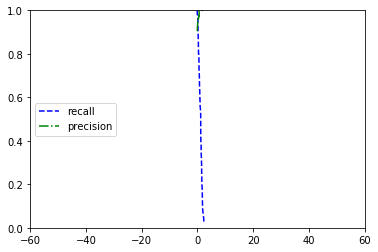

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(thresholds, recall[:-1], "b--", label="recall")
plt.plot(thresholds, precision[:-1], "g-.", label="precision")
plt.axis([-60, 60, 0, 1])
plt.legend(loc='center left')
plt.show()